In [1]:
# Climate Change Chatter from News Outlets and Social Media
# I obtained a dataset with over 100,000 urls of different news outlets. Of the categories social,

In [1]:
import requests
from bs4 import BeautifulSoup
import re
import nltk
import pandas as pd
import numpy as np

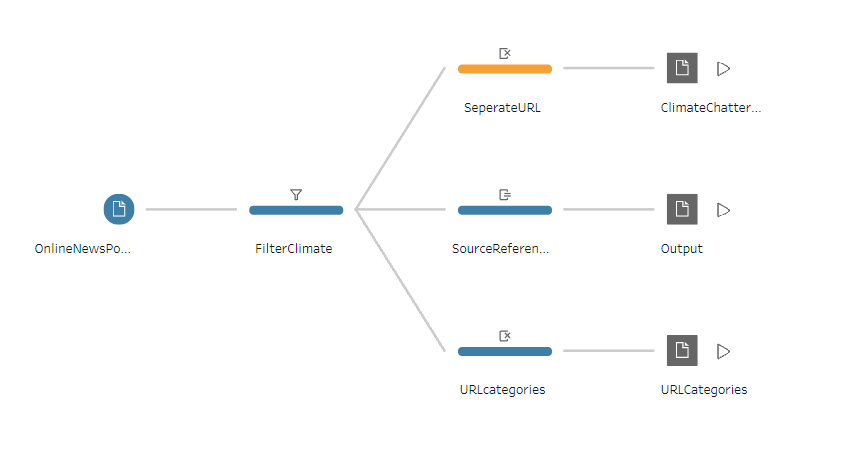

In [2]:

df=pd.read_csv('ClimateChatter.csv')



In [3]:
# There are 106 URL sources with 'climate' in the url, extracted from a 100,000 dump of different URLs from news sources
print(len(df))

106


In [4]:
df.describe()
df.head()




,url,n_tokens_title,n_tokens_content,n_unique_tokens,timedelta,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/03/03/petition-climat...,8,614,0.537705,676,1.0,0.757925,10,2,1,...,0.050000,0.8,-0.221068,-0.60,-0.071429,0.550000,0.050000,0.050000,0.050000,1700
1,http://mashable.com/2013/03/04/fix-climate-cha...,8,357,0.576705,675,1.0,0.798942,3,2,0,...,0.100000,1.0,-0.130000,-0.25,-0.050000,0.500000,0.700000,0.000000,0.700000,1700
2,http://mashable.com/2013/04/05/climate-change-...,11,461,0.523918,643,1.0,0.717647,9,4,1,...,0.100000,0.7,-0.320833,-0.40,-0.250000,0.000000,0.000000,0.500000,0.000000,14300
3,http://mashable.com/2013/07/03/8-new-cities-cl...,9,483,0.494670,554,1.0,0.604575,12,0,1,...,0.033333,1.0,-0.176111,-0.40,-0.100000,0.000000,0.000000,0.500000,0.000000,988
4,http://mashable.com/2013/08/01/google-climate-...,10,147,0.668966,525,1.0,0.802326,6,5,1,...,0.033333,0.5,0.000000,0.00,0.000000,0.454545,0.136364,0.045455,0.136364,1600


In [5]:
climate_words = []

for url in range(0, len(df)):
    page = requests.get(df.iloc[url]['url'])
    soup = BeautifulSoup(page.content, 'html.parser')
    findings = soup.find_all('p')

    for p in findings:
           text = ''.join(re.split('\[\d+\]', p.text))
           if text.strip()!='':
#          print(nltk.tokenize.sent_tokenize(text.strip()))
                climate_words.append(nltk.tokenize.sent_tokenize(text.strip()))

for x in climate_words:
    print(x)
    

['There are lots of petitions flying around the Internet these days, but none quite so ambitious as that of Ranga B. Myneni.', 'His petition has a single sentence that he hopes will be endorsed by a billion humans by the time Earth Day rolls around in 2014.', "Yeah, that's no typo: One Billion people.", "Here's what the petition says:"]
['Dear Secretary-General of the United Nations Ban Ki-moon,']
['We, the People of the Earth, request You to act judiciously and expeditiously to protect the Earth from anthropogenic climate change.']
['Respectfully,']
['People of the Earth']
['Start Date: March 1st;, 2013']
['End Date: April 22nd;, 2014 (Earth Day)']
['When I first saw the link posted by a third party on the American Geophysical Union (AGU) Facebook page on Friday morning, I was skeptical.', "It sounded kind of cool, but kind of crazy too, so I started checking out Myneni's credentials.", 'I found out that Myneni is no crank or fluffy-headed dreamer.', "On the contrary, he's a professor

In [6]:
#print number of paragraphs of text extracted from all the relevant climate URLs

print(len(climate_words))

1872


In [ ]:
#Collapse all the paragraphs into one body of text

In [7]:
climate_chatter = ""
result = np.array([])
result = climate_words[0];
for array in climate_words:
    result = np.concatenate([result, array])

for x in result:
    climate_chatter = climate_chatter + x

print(climate_chatter)
    

There are lots of petitions flying around the Internet these days, but none quite so ambitious as that of Ranga B. Myneni.His petition has a single sentence that he hopes will be endorsed by a billion humans by the time Earth Day rolls around in 2014.Yeah, that's no typo: One Billion people.Here's what the petition says:There are lots of petitions flying around the Internet these days, but none quite so ambitious as that of Ranga B. Myneni.His petition has a single sentence that he hopes will be endorsed by a billion humans by the time Earth Day rolls around in 2014.Yeah, that's no typo: One Billion people.Here's what the petition says:Dear Secretary-General of the United Nations Ban Ki-moon,We, the People of the Earth, request You to act judiciously and expeditiously to protect the Earth from anthropogenic climate change.Respectfully,People of the EarthStart Date: March 1st;, 2013End Date: April 22nd;, 2014 (Earth Day)When I first saw the link posted by a third party on the American G

In [8]:
# Remove stopwords and tokenize text, to determine text importance (feature/word importance)

from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english')) 
from nltk.tokenize import word_tokenize 
text_tokens = word_tokenize(climate_chatter)

tokens_without_sw = [word for word in text_tokens if not word in stop_words]

  
print(tokens_without_sw)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\uosun\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


['There', 'lots', 'petitions', 'flying', 'around', 'Internet', 'days', ',', 'none', 'quite', 'ambitious', 'Ranga', 'B.', 'Myneni.His', 'petition', 'single', 'sentence', 'hopes', 'endorsed', 'billion', 'humans', 'time', 'Earth', 'Day', 'rolls', 'around', '2014.Yeah', ',', "'s", 'typo', ':', 'One', 'Billion', 'people.Here', "'s", 'petition', 'says', ':', 'There', 'lots', 'petitions', 'flying', 'around', 'Internet', 'days', ',', 'none', 'quite', 'ambitious', 'Ranga', 'B.', 'Myneni.His', 'petition', 'single', 'sentence', 'hopes', 'endorsed', 'billion', 'humans', 'time', 'Earth', 'Day', 'rolls', 'around', '2014.Yeah', ',', "'s", 'typo', ':', 'One', 'Billion', 'people.Here', "'s", 'petition', 'says', ':', 'Dear', 'Secretary-General', 'United', 'Nations', 'Ban', 'Ki-moon', ',', 'We', ',', 'People', 'Earth', ',', 'request', 'You', 'act', 'judiciously', 'expeditiously', 'protect', 'Earth', 'anthropogenic', 'climate', 'change.Respectfully', ',', 'People', 'EarthStart', 'Date', ':', 'March', '1st

In [9]:
# Remove Stem words
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer 
#lemmatizer = WordNetLemmatizer()
lemmatizer = nltk.stem.WordNetLemmatizer()
lemmatizer_tokens = [lemmatizer.lemmatize(s) for s in tokens_without_sw]

print(lemmatizer_tokens)

['There', 'lot', 'petition', 'flying', 'around', 'Internet', 'day', ',', 'none', 'quite', 'ambitious', 'Ranga', 'B.', 'Myneni.His', 'petition', 'single', 'sentence', 'hope', 'endorsed', 'billion', 'human', 'time', 'Earth', 'Day', 'roll', 'around', '2014.Yeah', ',', "'s", 'typo', ':', 'One', 'Billion', 'people.Here', "'s", 'petition', 'say', ':', 'There', 'lot', 'petition', 'flying', 'around', 'Internet', 'day', ',', 'none', 'quite', 'ambitious', 'Ranga', 'B.', 'Myneni.His', 'petition', 'single', 'sentence', 'hope', 'endorsed', 'billion', 'human', 'time', 'Earth', 'Day', 'roll', 'around', '2014.Yeah', ',', "'s", 'typo', ':', 'One', 'Billion', 'people.Here', "'s", 'petition', 'say', ':', 'Dear', 'Secretary-General', 'United', 'Nations', 'Ban', 'Ki-moon', ',', 'We', ',', 'People', 'Earth', ',', 'request', 'You', 'act', 'judiciously', 'expeditiously', 'protect', 'Earth', 'anthropogenic', 'climate', 'change.Respectfully', ',', 'People', 'EarthStart', 'Date', ':', 'March', '1st', ';', ',', '

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

X = vectorizer.fit_transform(lemmatizer_tokens)
climate_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [30]:
# Show top few records of vectorized tokens

climate_df

,00,000,01,010,030,04,05,06,09,0lqxwf1q8b,...,zeroed,zhang,zhenhua,zhenmin,zhenya,ziemlinski,zone,zonescape,zooxanthellae,zplt28lcmv
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51569,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51571,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51572,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
climate_df.head()

# get the most frequently occuring words within the chatter base
# These words have been lemmatized to show an accurate a possible a list without duplicating word occurence

climate_df.sum().sort_values(ascending=False).head(20)

climate     959
the         519
change      453
said        359
global      323
emission    298
year        269
warming     239
new         238
carbon      232
world       215
country     206
would       184
one         169
energy      161
in          160
also        155
report      152
gas         151
level       142
dtype: int64

In [ ]:
# Determine feature Importance utilizing TF-IDF
# TF-IDF weight is composed by two terms: Term Frequency (TF)/ total no of words in that document;
# TF: Term Frequency, which measures how frequently a term occurs in a document.
# TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document).
# IDF: Inverse Document Frequency, which measures how important a term is. 
# IDF(t) = log_e(Total number of documents / Number of documents with term t in it).

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english',  max_features=30000)

X = vectorizer.fit_transform(result)

tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())

tfidf_df.mean().sort_values(ascending=False).head(20)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


climate       0.030788
change        0.018401
said          0.016271
emissions     0.014358
global        0.013944
carbon        0.011545
warming       0.011243
new           0.010935
world         0.010862
energy        0.008732
year          0.008441
china         0.008339
years         0.008128
report        0.007593
summit        0.007288
countries     0.007165
time          0.007028
people        0.006796
obama         0.006397
scientists    0.006337
dtype: float64

<AxesSubplot:title={'center':'Climate Chatter Words by TFID Importance'}, xlabel='Word', ylabel='Total TFID'>

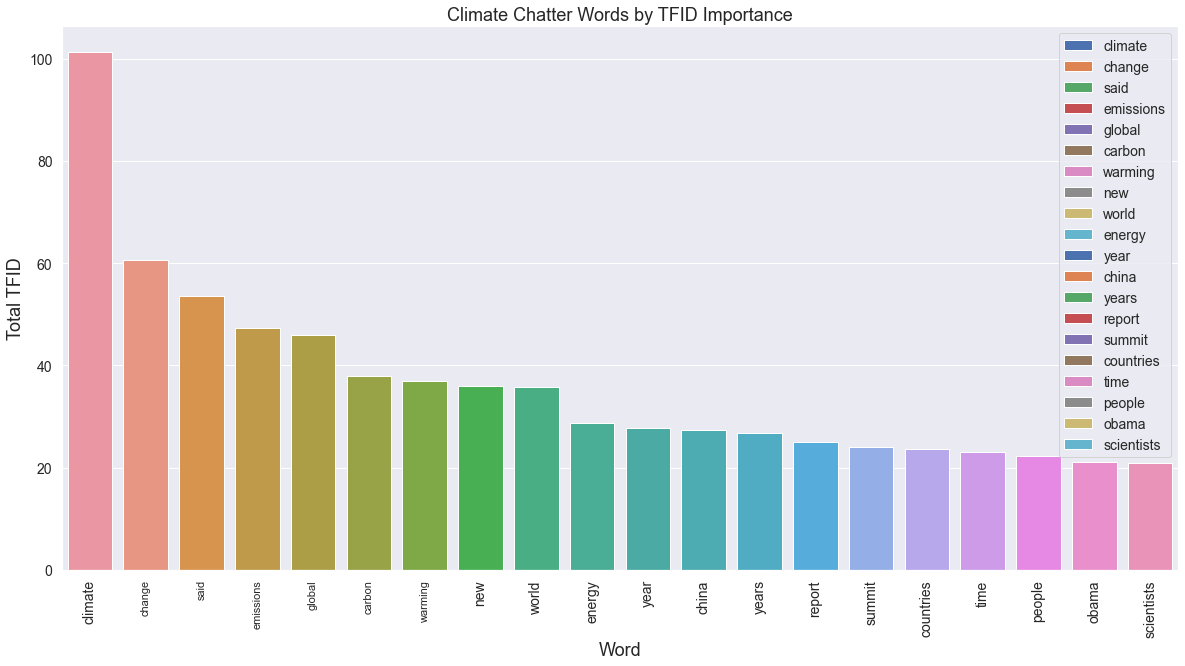

In [13]:
#seaborn components used: set_theme(), load_dataset(), lineplot()
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 
sns.set_theme(style="darkgrid")

# Accumulated TFID importance across all the documents
total_tfid = tfidf_df.sum().sort_values(ascending=False).head(20)
total_tfid.columns =['Feature']
df1 = pd.DataFrame(total_tfid)
total_df2=df1.transpose()
 
    
total_df2.plot(kind="bar",figsize=(20, 10))
plt.title("Climate Chatter Words by TFID Importance",fontsize = 18)
plt.xlabel("Word",fontsize = 18)
plt.ylabel("Total TFID",fontsize = 18)
plt.legend(fontsize = 14)
plt.xticks(fontsize =14)
plt.yticks(fontsize =14)
# Plot the feature importance
sns.barplot(data=total_df2)

<AxesSubplot:title={'center':'Climate Chatter Words by TFID Importance'}, xlabel='Word', ylabel='Mean TFID'>

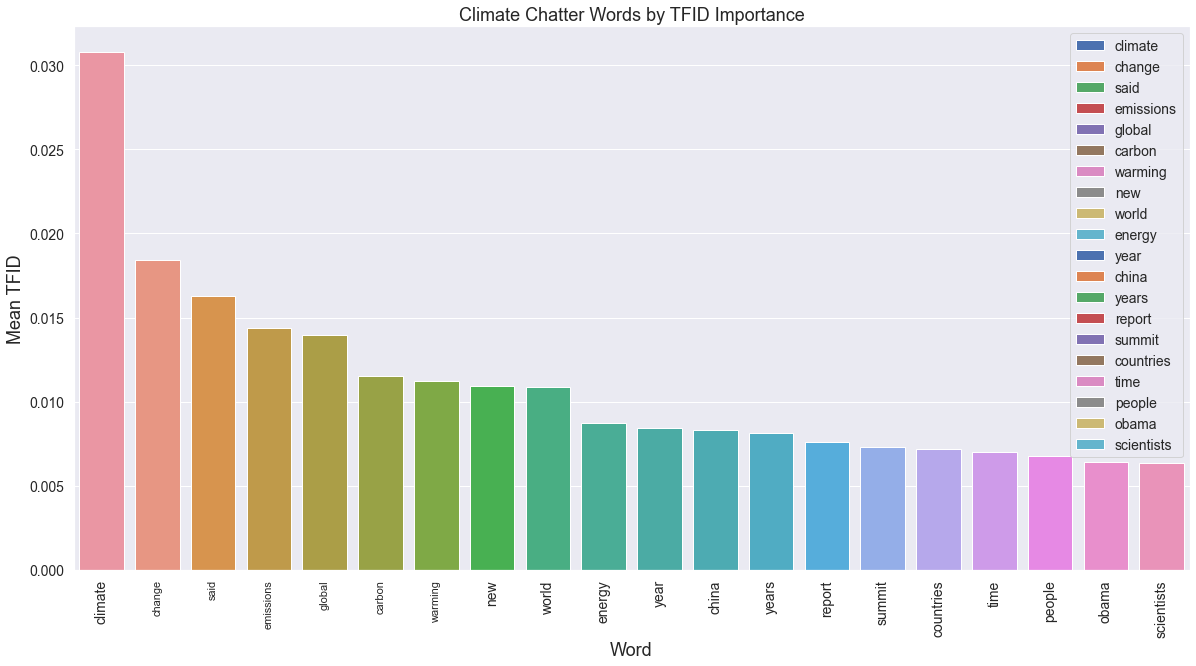

In [14]:

sns.set_theme(style="darkgrid")

# Accumulated TFID importance across all the documents
mean_tfid = tfidf_df.mean().sort_values(ascending=False).head(20)
mean_tfid.columns =['Feature']
df1 = pd.DataFrame(mean_tfid)
mean_df2=df1.transpose()
    
mean_df2.plot(kind="bar",figsize=(20, 10))
plt.title("Climate Chatter Words by TFID Importance",fontsize = 18)
plt.xlabel("Word",fontsize = 18)
plt.ylabel("Mean TFID",fontsize = 18)
plt.legend(fontsize = 14)
plt.xticks(fontsize =14)
plt.yticks(fontsize =14)
plt.savefig('wordMeanTFID.jpg')

# Plot the feature importance
sns.barplot(data=mean_df2)

In [15]:
 !pip install wordcloud

You should consider upgrading via the 'C:\ProgramData\Anaconda3\python.exe -m pip install --upgrade pip' command.


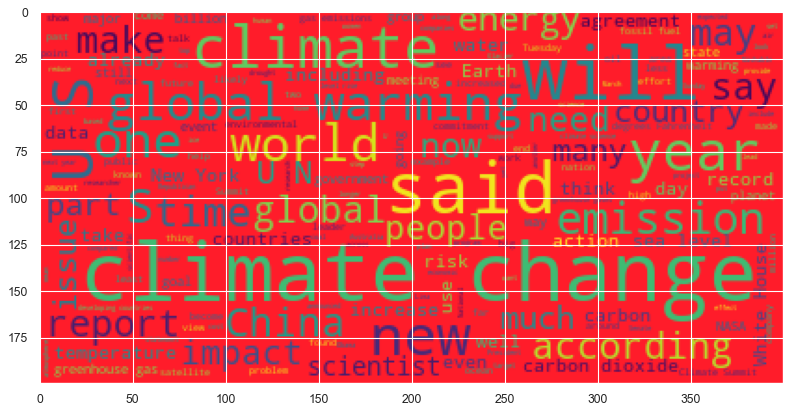

In [34]:
from matplotlib.pyplot import figure
from wordcloud import WordCloud

import matplotlib.pyplot as plt
%matplotlib inline
figure(figsize=(12, 12), dpi=80)
wordcloud = WordCloud(background_color='#ff1c2a').generate(climate_chatter)

plt.imshow(wordcloud);
plt.savefig("wordClimateCloud.jpg")


In [ ]:
df=pd.read_csv('ClimateURLcategories.csv')

In [ ]:
df.describe()
#df.head()